In [1]:
!pip install -U scipy 
!pip install -U numba 
!pip install -U numpy 
!pip install -U jinja2 
!pip install -U pandas
!pip install -U matplotlib 
!pip install -U seaborn 
!pip install -U scikit-learn 
!pip install imbalanced-learn -q 
!pip install shap -q 
!pip install phik -q

     |████████████████████████████████| 38.6 MB 167 kB/s eta 0:00:01
     |████████████████████████████████| 19.5 MB 53.8 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.1
    Uninstalling numpy-1.21.1:
      Successfully uninstalled numpy-1.21.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.1
    Uninstalling scipy-1.9.1:
      Successfully uninstalled scipy-1.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.0 requires numpy<1.23,>=1.18, but you have numpy 2.0.2 which is incompatible.
     |████████████████████████████████| 3.7 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 43.9 MB 68 kB/s s eta 0:00:01
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.0
    Uninstalling llvmlite-0.39.0:
      Successfully uninstalled llvmlite-0.39

In [2]:
def setup_environment():
    required_packages = {
        'phik': 'phik',
        'shap': 'shap',
        'sklearn': 'scikit-learn'
    }
    
    for import_name, package_name in required_packages.items():
        try:
            __import__(import_name)
            print(f"{package_name} уже установлен")
        except ImportError:
            print(f"⏳ Устанавливаем {package_name}...")
            !pip install -q {package_name}
            print(f"{package_name} успешно установлен")
    
    print("\nВсе зависимости готовы к работе!")

# вызов функции при старте ноутбука
setup_environment()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/conda/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.9/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.9/site-packages/ipykernel/kerne

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/conda/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.9/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.9/site-packages/ipykernel/kerne

AttributeError: _ARRAY_API not found

phik уже установлен
shap уже установлен
scikit-learn уже установлен

Все зависимости готовы к работе!


In [3]:
import os
from urllib.request import urlopen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split)
from sklearn.preprocessing import (RobustScaler, 
                                   MinMaxScaler, 
                                   StandardScaler,
                                   PolynomialFeatures)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
import phik
from phik import phik_matrix
import shap
import scipy
from urllib.request import urlopen
from io import StringIO
from sklearn.metrics import root_mean_squared_error
from sklearn.base import TransformerMixin, BaseEstimator
from numpy.random import RandomState

In [4]:
!pip list

Package                           Version
--------------------------------- -------------------
absl-py                           1.2.0
alembic                           1.6.5
anyio                             3.2.1
argon2-cffi                       20.1.0
astunparse                        1.6.3
async-generator                   1.10
attrs                             21.2.0
Babel                             2.9.1
backcall                          0.2.0
backports.functools-lru-cache     1.6.4
beautifulsoup4                    4.9.3
bleach                            3.3.0
blinker                           1.4
blis                              0.7.8
branca                            0.5.0
brotlipy                          0.7.0
cachetools                        5.2.0
catalogue                         2.0.8
catboost                          1.0.3
certifi                           2022.6.15
certipy                           0.1.3
cffi                              1.14.5
chardet             

# Описание проекта

Допустим, мы работаем в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 100 000 месторождений, где измерили качество нефти и объём её запасов. Построим модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**У нас есть 3 датасета со следующими признаками:**
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

**Условия задачи:**
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

# Загрузка и подготовка данных

## Загрузка данных

**Выведем по 3 строки каждого датасета.**

In [5]:
file_paths = {
    'df_1': [
        'geo_data_0.csv',                          # локальный путь
        '/datasets/geo_data_0.csv',                # серверный путь
        'https://code.s3.yandex.net/datasets/geo_data_0.csv'  # URL
    ],
    'df_2': [
        'geo_data_1.csv',                                        # локальный путь
        '/datasets/geo_data_1.csv',                              # серверный путь
        'https://code.s3.yandex.net/datasets/geo_data_1.csv'     # URL
    ],
    'df_3': [
        'geo_data_2.csv',                    # локальный путь
        '/datasets/geo_data_2.csv',          # серверный путь
        'https://code.s3.yandex.net/datasets/geo_data_2.csv'  # URL
    ]
    
}

def find_and_read_csv(filename, **kwargs):
    for path in file_paths[filename]:
        try:
            if path.startswith('http'):
                with urlopen(path) as response:
                    data = response.read().decode('utf-8')
                # для URL-файлов сначала загружаем без индекса, затем проверяем наличие 'id'
                temp_df = pd.read_csv(StringIO(data), **kwargs)
                if 'id' in temp_df.columns:
                    temp_df.set_index('id', inplace=True)
                return temp_df
            elif os.path.exists(path):
                # для локальных файлов сначала пробуем с index_col, затем проверяем
                try:
                    return pd.read_csv(path, index_col='id', **kwargs)
                except KeyError:
                    temp_df = pd.read_csv(path, **kwargs)
                    if 'id' in temp_df.columns:
                        temp_df.set_index('id', inplace=True)
                    return temp_df
        except Exception as e:
            print(f"Ошибка при обработке {path}: {str(e)}")
            continue
    
    print(f"Файл {filename} не найден ни по одному из путей: {file_paths[filename]}")
    return None

df_1 = find_and_read_csv('df_1')
df_2 = find_and_read_csv('df_2')
df_3 = find_and_read_csv('df_3')

In [6]:
df_1.head(3)

,f0,f1,f2,product
id,,,,
txEyH,0.705745,-0.497823,1.221170,105.280062
2acmU,1.334711,-0.340164,4.365080,73.037750
409Wp,1.022732,0.151990,1.419926,85.265647


In [7]:
df_2.head(3)

,f0,f1,f2,product
id,,,,
kBEdx,-15.001348,-8.276000,-0.005876,3.179103
62mP7,14.272088,-3.475083,0.999183,26.953261
vyE1P,6.263187,-5.948386,5.001160,134.766305


In [8]:
df_3.head(3)

,f0,f1,f2,product
id,,,,
fwXo0,-1.146987,0.963328,-0.828965,27.758673
WJtFt,0.262778,0.269839,-2.530187,56.069697
ovLUW,0.194587,0.289035,-5.586433,62.871910


**Готово, перейдём к следующему шагу.**

## Предобработка данных

**Подбробнее изучим данные и проверим на наличие ошибок.**

In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, txEyH to 1CWhH
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB


In [10]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, kBEdx to relB0
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB


In [11]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, fwXo0 to V9kWn
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB


**Пропусков не найдено.**

In [12]:
display(f'Дубликаты в 1 датафрейме: {df_1.duplicated().sum()}')
display(f'Дубликаты в 2 датафрейме: {df_2.duplicated().sum()}')
display(f'Дубликаты в 3 датафрейме: {df_3.duplicated().sum()}')

'Дубликаты в 1 датафрейме: 0'

'Дубликаты в 2 датафрейме: 0'

'Дубликаты в 3 датафрейме: 0'

**Дубликатов не найдено.**

**Данные без явных ошибок, перейдём к исследовательскому анализу.**

## Исследовательский анализ

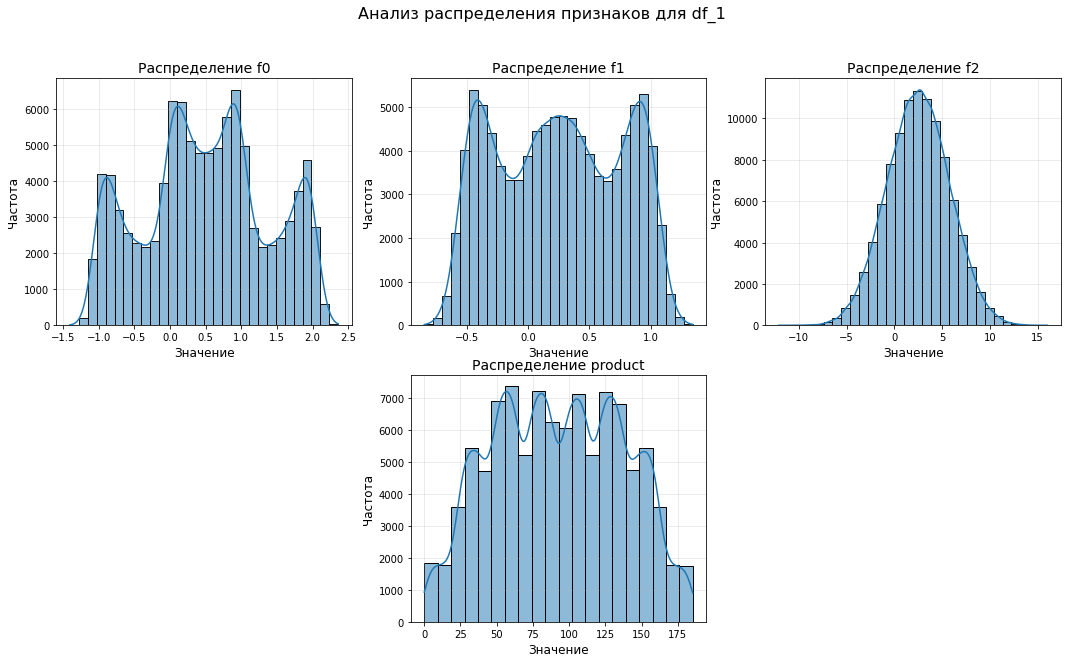

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.delaxes(axes[1, 0])
fig.delaxes(axes[1, 2])

def histgr(df, col, ax, bins):
    sns.histplot(df[col], bins=bins, ax=ax, kde=True)
    ax.set_title(f'Распределение {col}', fontsize=14)
    ax.set_ylabel('Частота', fontsize=12)
    ax.set_xlabel('Значение', fontsize=12)
    ax.grid(alpha=0.3)

histgr(df_1, 'f0', axes[0, 0], 30)
histgr(df_1, 'f1', axes[0, 1], 30)
histgr(df_1, 'f2', axes[0, 2], 30)
histgr(df_1, 'product', axes[1, 1], 20)

fig.suptitle('Анализ распределения признаков для df_1', fontsize=16);

- Выбросы отсутствуют;
- `f0`: значения лежат в промежутке от `-1.5` до `2.5`, имеется `4` пиковых значении;
- `f1`: значения лежат в промежутке от `-0.9` до `1.9`, имеется `3` пиковых значении;
- `f2`: значения лежат в промежутке от `-10` до `15`, пиковое значение `2.5`;
- `product`: значения лежат в промежутке от `0` до `180`, распределение имеет `множество` пиковых значении.

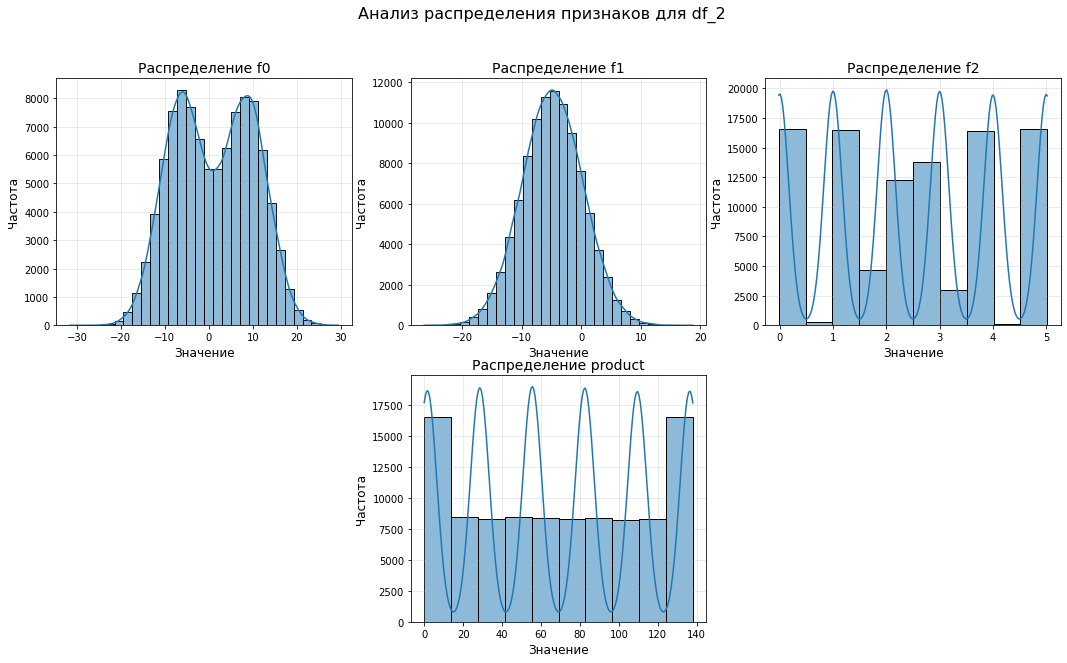

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.delaxes(axes[1, 0])
fig.delaxes(axes[1, 2])

histgr(df_2, 'f0', axes[0, 0], 30)
histgr(df_2, 'f1', axes[0, 1], 30)
histgr(df_2, 'f2', axes[0, 2], 10)
histgr(df_2, 'product', axes[1, 1], 10)

fig.suptitle('Анализ распределения признаков для df_2', fontsize=16);

- Выбросы отсутствуют;
- `f0`: значения лежат в промежутке от `-25` до `25`, имеется `2` пиковых значении;
- `f1`: значения лежат в промежутке от `-22` до `12`, пиковое значение `-4`;
- `f2`: значения лежат в промежутке от `0` до `5`, распределение `не нормальное`;
- `product`: значения лежат в промежутке от `0` до `140`, `2` пиковых значение `в начале` и `в конце` распределения.

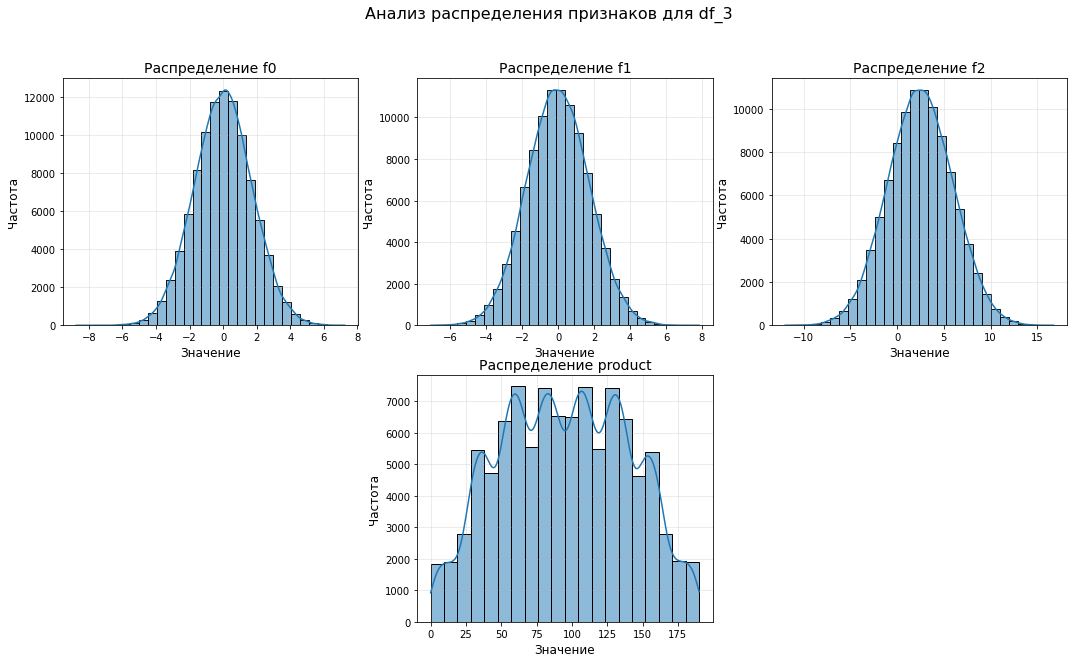

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.delaxes(axes[1, 0])
fig.delaxes(axes[1, 2])

histgr(df_3, 'f0', axes[0, 0], 30)
histgr(df_3, 'f1', axes[0, 1], 30)
histgr(df_3, 'f2', axes[0, 2], 30)
histgr(df_3, 'product', axes[1, 1], 20)

fig.suptitle('Анализ распределения признаков для df_3', fontsize=16);

- Выбросы отсутствуют;
- `f0`: значения лежат в промежутке от `-6` до `6`, пиковое значение `0`;
- `f1`: значения лежат в промежутке от `-6` до `6`, пиковое значение `0`;
- `f2`: значения лежат в промежутке от `-10` до `15`, пиковое значение `2.5`;
- `product`: значения лежат в промежутке от `0` до `190`, распределение имеет `множество` пиковых значении.

**Посмотрим, есть ли повторяющиеся индексы, в случае их обнаружения - избавимся от них.**

In [16]:
for i, df in enumerate([df_1, df_2, df_3], 1):
    dup_count = df.index.duplicated().sum()
    display(f"В df_{i} найдено {dup_count} дубликатов индексов.")
    if i == 1:
        df_1 = df[~df.index.duplicated(keep='first')]
    elif i == 2:
        df_2 = df[~df.index.duplicated(keep='first')]
    elif i == 3:
        df_3 = df[~df.index.duplicated(keep='first')]

'В df_1 найдено 10 дубликатов индексов.'

'В df_2 найдено 4 дубликатов индексов.'

'В df_3 найдено 4 дубликатов индексов.'

**В данных нет выбросов и пропусков, большинство данных имеют нормальное распределение, было найдено 18 повторяющихся индексов от них мы избавилсь.**

**Теперь проверим данные на мультиколлинеарность.**

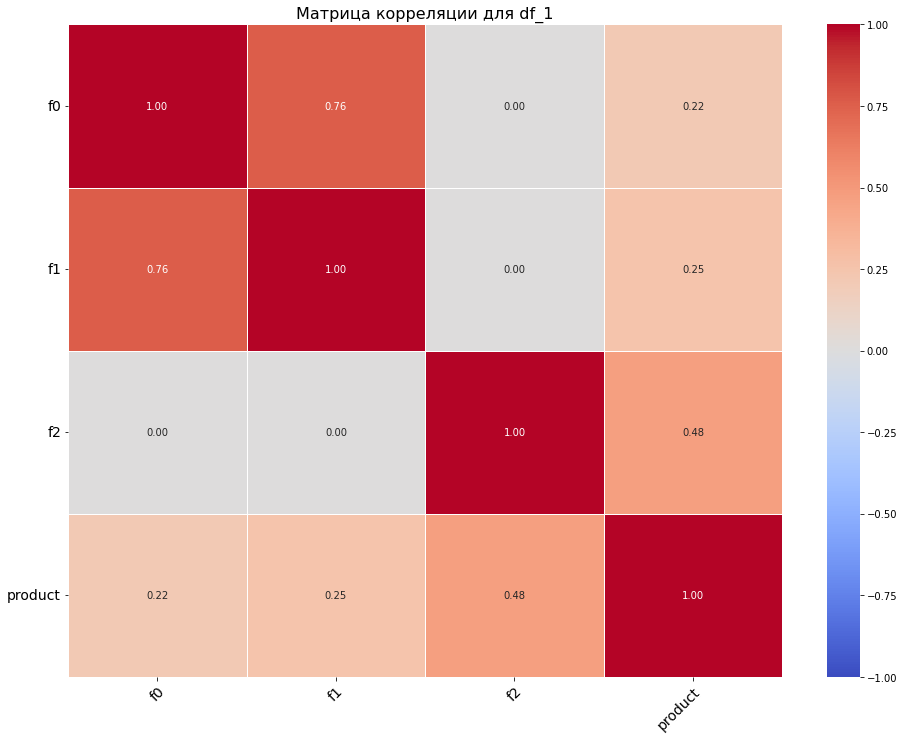

In [17]:
col = [
    'f0',
    'f1',
    'f2',
    'product'
]

def corr_df(df_name, df, col):
    pm = phik_matrix(df, interval_cols=col)

    plt.figure(figsize=(16, 12))
    sns.heatmap(
        pm, 
        annot=True, 
        cmap='coolwarm', 
        center=0, 
        fmt='.2f',
        vmin=-1, 
        vmax=1,
        linewidths=0.5
    )
    plt.xticks(
        rotation=45, 
        ha='right',
        rotation_mode='anchor',
        fontsize=12
    )
    plt.title(f'Матрица корреляции для {df_name}', fontsize=16)

    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14, rotation=0);
    
corr_df('df_1', df_1, col)

**В `df_1` есть высокая корреляция между признаками `f0` и `f1`, но удалять их не стоит, для нас порог - `0.9`.**

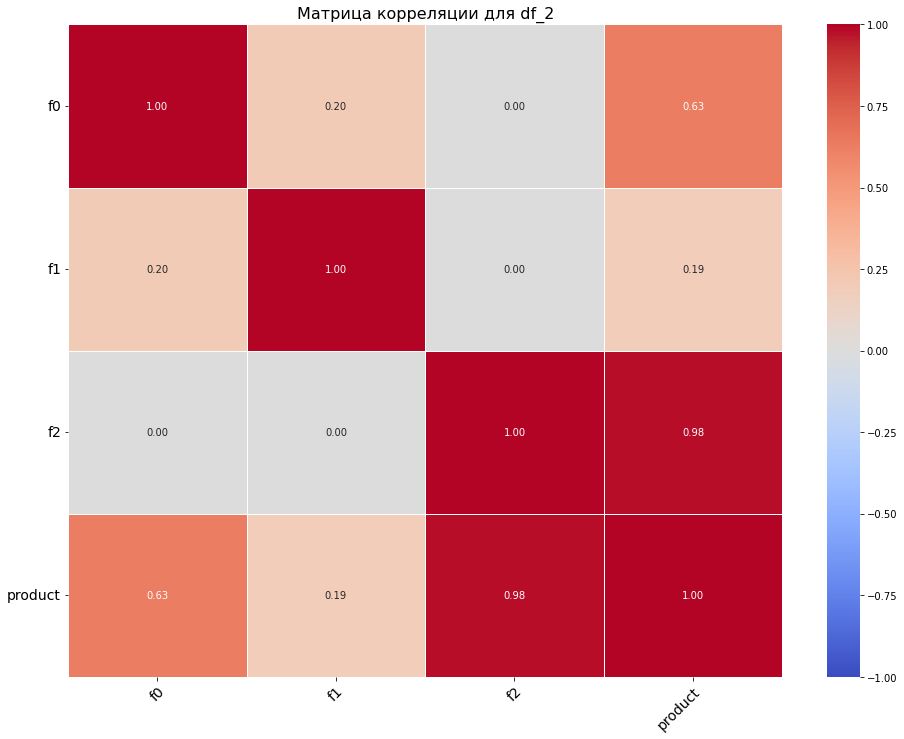

In [18]:
corr_df('df_2', df_2, col)

**Можно сказать, корреляция совсем отсутствует между входными признаками, но есть высокая корреляцию с целевым, но в этом нет ничего плохо.**

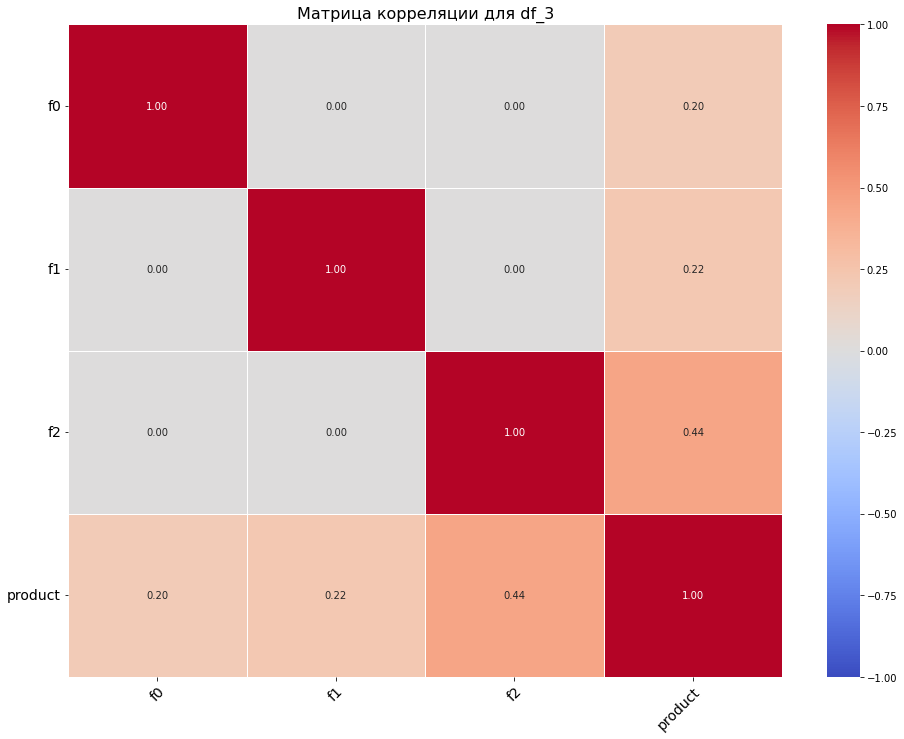

In [19]:
corr_df('df_3', df_3, col)

**Корреляцию между входными признаками нулевая.**

**Данные готовы для дальнейшей работы.**

# Обучение и проверка модели

**Обучение и проверку будем проводить для каждого региона отдельно. Разобьём данные на тренировочные и валидационную с соотношением `75:25`. Напомню, для обучения модели подходит лишь `линейная регрессия`.**

## Регион 1

In [20]:
RANDOM_STATE = 42

X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(df_1.drop('product', axis=1),
                                                             df_1['product'],
                                                             random_state=RANDOM_STATE,
                                                             test_size=0.25)

pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('preprocessor', MinMaxScaler()),
    ('models', LinearRegression())
])

param_grid = [
    {    
        'models': [LinearRegression()],
        'preprocessor': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]



In [21]:
grid_search = GridSearchCV(
    pipe,
    param_grid,
    scoring = 'neg_root_mean_squared_error',
    cv = 5,
    n_jobs = -1)

In [22]:
grid_search.fit(X_train_1, y_train_1)

display('Лучшие параметры:', grid_search.best_params_)
display('Лучшая RMSE (на валидации):', -grid_search.best_score_)

'Лучшие параметры:'

{'models': LinearRegression(), 'preprocessor': StandardScaler()}

'Лучшая RMSE (на валидации):'

np.float64(37.69737212477702)

**Готово, модель обучена, `RMSE`(корень из среднеквадратичной ошибки) на валидационной выборке показала `37.69` - хороший результат, теперь проверим модель на валидационной выборке.**

In [23]:
gs_1 = grid_search.predict(X_valid_1)

display(f'Метрика RMSE {root_mean_squared_error(y_valid_1, gs_1)}')

'Метрика RMSE 37.686766184788304'

**Метрика показала `37.68`, можно сказать, что отличии почти нет.**

**Теперь вычислим среднее истинного и предсказанных значении.**

In [24]:
display(f'Истинное среднее: {y_valid_1.mean()}')
display(f'Предсказанное среднее: {gs_1.mean()}')

'Истинное среднее: 92.38876593595461'

'Предсказанное среднее: 92.60947216204708'

**Средние значения почти не отличаются, но RMSE для такого среднее слишком высокое, около `40%`.**

## Регион 2

**Пункты будут почти те же, что и в 1 регионе.**

In [25]:
X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(df_2.drop('product', axis=1),
                                                             df_2['product'],
                                                             random_state=RANDOM_STATE,
                                                             test_size=0.25)

grid_search.fit(X_train_2, y_train_2)

display('Лучшие параметры:', grid_search.best_params_)
display('Лучшая RMSE (на валидации):', -grid_search.best_score_)

gs_2 = grid_search.predict(X_valid_2)
display(f'Метрика RMSE {root_mean_squared_error(y_valid_2, gs_2)}')

display(f'Истинное среднее: {y_valid_2.mean()}')
display(f'Предсказанное среднее: {gs_2.mean()}')

'Лучшие параметры:'

{'models': LinearRegression(), 'preprocessor': StandardScaler()}

'Лучшая RMSE (на валидации):'

np.float64(0.889607362143472)

'Метрика RMSE 0.8928627515102701'

'Истинное среднее: 68.58361591061642'

'Предсказанное среднее: 68.57695698999848'

**Метрики и средние значения близки друг к другу:**
- RMSE на валидации: 0.89;
- RMSE: 0.89;
- Истинное среднее: 68.58;
- Предсказанное среднее: 68.57.

**Второй регион по метрикам показал себя намного лучше, чем первый, взглянем на третий регион.**

## Регион 3

In [26]:
X_train_3, X_valid_3, y_train_3, y_valid_3 = train_test_split(df_3.drop('product', axis=1),
                                                             df_3['product'],
                                                             random_state=RANDOM_STATE,
                                                             test_size=0.25)

grid_search.fit(X_train_3, y_train_3)

display('Лучшие параметры:', grid_search.best_params_)
display('Лучшая RMSE (на валидации):', -grid_search.best_score_)

gs_3 = grid_search.predict(X_valid_3)
display(f'Метрика RMSE {root_mean_squared_error(y_valid_3, gs_3)}')

display(f'Истинное среднее: {y_valid_3.mean()}')
display(f'Предсказанное среднее: {gs_3.mean()}')

'Лучшие параметры:'

{'models': LinearRegression(), 'preprocessor': MinMaxScaler()}

'Лучшая RMSE (на валидации):'

np.float64(38.7566434617804)

'Метрика RMSE 38.839497223075995'

'Истинное среднее: 95.25463671658842'

'Предсказанное среднее: 94.97085603650159'

**Метрики и средние значения так же близки друг к другу:**
- RMSE на валидации: 38.75;
- RMSE: 38.84;
- Истинное среднее: 95.25;
- Предсказанное среднее: 94.97.

**Модель так же показывает плохие результаты для третьего региона.**

**Лучшая модель получилась для `2` региона `RMSE` `0.89` при среднем в `68.57`, у других же `RMSE` равна `40%` от истинного среднего. Большая вероятность, что такие хорошие показатели получились из-за высокой корреляции в df_2 между целевых и входным признаками.**

# Подготовка к расчёту прибыли

**Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели. Напомню:**
- Бюджет на разработку скважин в регионе — 10 млрд рублей;
- Пробурить можно лишь 200 скважин;
- Один баррель сырья приносит 450 рублей дохода;
- Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

**Для каждого региона мы выберем 200 лучших скважин и расчитаем, сколько должно быть продутка для безубыточного бурения.**

In [27]:
BUDGET = 10000000000    #10 млрд
BARREL = 450000

not_luss = BUDGET/(BARREL*200)
round(not_luss, 2)

111.11

**Для безубыточного бурения одна скважина должна приносить 111.12 продутка.**

In [28]:
me = df_1['product'].mean()

display(f"Среднее df_1: {me}")
bud = me*BARREL*200-BUDGET
display(f"Прибыль при нынешнем среднем от 200 скважин: {bud}")

'Среднее df_1: 92.49968421774354'

'Прибыль при нынешнем среднем от 200 скважин: -1675028420.403081'

**От 1 региона будет убыток в 1.675млрд.**

In [29]:
me = df_2['product'].mean()

display(f"Среднее df_1: {me}")
bud = me*BARREL*200-BUDGET
display(f"Прибыль при нынешнем среднем от 200 скважин: {bud}")

'Среднее df_1: 68.82391591804064'

'Прибыль при нынешнем среднем от 200 скважин: -3805847567.376343'

**От 2 региона будет убыток в 3.805млрд.**

In [30]:
me = df_3['product'].mean()

display(f"Среднее df_1: {me}")
bud = me*BARREL*200-BUDGET
display(f"Прибыль при нынешнем среднем от 200 скважин: {bud}")

'Среднее df_1: 94.99834211933378'

'Прибыль при нынешнем среднем от 200 скважин: -1450149209.2599602'

**От 3 региона будет убыток в 1.450млрд.**

**Если каждая скважина имела среднее количество продукта по региону, то от каждого региона можно было ожидать лишь убыток, поэтому стоит выбирать лишь лучшие точки для бурения, чтобы избежать убытков.**

# Расчёт прибыли и рисков

## Лучший вариант

**Создадим функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели. На вход она будет принимать датафрейм, в котором есть предсказанные и истенные значения, для выбора 200 лучших будем использовать предсказанные значения, а для подсчёта прибыли уже настоящие.**

In [31]:
def res(valid, gs):  # функция для создания датафрейма
    gs_series = pd.Series(gs.flatten(), index=valid.index, name='predicted')
    result = pd.concat([valid, gs_series], axis=1)
    return result

In [32]:
def calculate_profit(result):
    result = result.sort_values(by='predicted', ascending=False)
    top_200 = result.head(200)
    sum_prod = top_200['product'].sum()*450000
    return sum_prod

In [33]:
result_1 = res(y_valid_1, gs_1)
result_2 = res(y_valid_2, gs_2)
result_3 = res(y_valid_3, gs_3)

display(f"Прибыль на валидационной выборке df_1 {calculate_profit(result_1)}")
display(f"Прибыль на валидационной выборке df_2 {calculate_profit(result_2)}")
display(f"Прибыль на валидационной выборке df_3 {calculate_profit(result_3)}")


'Прибыль на валидационной выборке df_1 13419153610.303364'

'Прибыль на валидационной выборке df_2 12415086696.68151'

'Прибыль на валидационной выборке df_3 12972205789.987478'

**Можем заметить, что прибыль будет превышать затраты в среднем на `3 млрд`, но это в `лучшем случае`, теперь попробуем посмотреть на реальность с помощью `Bootstrap`.**

## Bootstrap

**Немного изменим нашу функцию подсчёта: теперь она случайным образом будет выбирать `500` точек, из нее так же будут отобраны `200` лучшие точки по мнению модели, подсчёт прибыли будет идти так же по истинным значениям. Далее применим технику `Bootstrap` с `1000` выборок, чтобы найти распределение прибыли. Так же найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков.**

In [40]:
state = np.random.RandomState(12345)
alpha = 0.05
bootstrap_samples = 1000

def random_sam(results):
    sample = results.sample(n=500, replace=False, random_state=state)
    sample = sample.sort_values(by='predicted', ascending=False).head(200)
    return sample['product'].sum()*450000

def boots(results):
    profit = []
    for i in range(bootstrap_samples):
        prof = random_sam(results)
        profit.append(prof)
        
    profit = pd.array(profit)
    
    return {
        (f'Средняя выручка: {round(profit.mean(), 2)}'),
        (f'2.5 процентиль прибыли: {round(np.percentile(profit, 2.5), 2) - BUDGET}'),
        (f'97.5 процентиль прибыли: {round(np.percentile(profit, 97.5), 2) - BUDGET}'),
        (f'Риск убытка: {round((profit<10000000000).mean(), 2)*100}%')}

In [41]:
analysis_result = boots(result_1)
analysis_result

{'2.5 процентиль прибыли: -133077234.97999954',
 '97.5 процентиль прибыли: 859798467.1000004',
 'Риск убытка: 6.0%',
 'Средняя выручка: 10401133566.56'}

**Для `1 региона` риск убытка равен `6%`, а средняя выручка - `10.4 млрд`. Хорошие показатели, более 40 млн прибыли. Взглянем на другие регионы.**

In [42]:
analysis_result = boots(result_2)
analysis_result

{'2.5 процентиль прибыли: 28219414.420000076',
 '97.5 процентиль прибыли: 857248335.5599995',
 'Риск убытка: 2.0%',
 'Средняя выручка: 10440179234.55'}

**Показатали `2 региона` ещё лучше, риск убытка - `2%`, а средняя выручка `10.44` млрд.**

In [43]:
analysis_result = boots(result_3)
analysis_result

{'2.5 процентиль прибыли: 67379853.88999939',
 '97.5 процентиль прибыли: 1090666272.040001',
 'Риск убытка: 1.0%',
 'Средняя выручка: 10580871309.03'}

**Самый лучший регион для бурения, риск убытка - `1%`, а выручка - `10.58 млрд`.**

**Можно смело заявить, лучший регион для бурения - `3`, самая высокая прибыль - более `58 млн`, так же у нее одна из самых низких вероятностей убытков - всего `1%`.**

# Вывод

**После небольшой предобработки данных мы сразу перешли к исследовательскому анализу, никаких аномалии не было выявлено, кроме одной: во втором регионе один входной признак сильно влиял на целевой(более 90% коллениарности), что вероятно всего повлияло на обучение модели:**
- `1 регион`: истинное среднее целевого признака - `92.39`, а `RMSE` `37.68`, довольно высокий разброс для такого среднего;
- `2 регион`: истинное среднее целевого признака - `68.58`, `RMSE` `0.89` - хороший показатель;
- `3 регион`: истинное среднее целевого признака - `95.25`, как и в 1 регионе `RMSE` высокий - `38.84`.

**Но даже плохие показатели метрик показали, что каждый регион с высокой вероятностью принесут прибыль:**
- `1 регион`: риск убытка - `0.06%`, средняя прибыль - `40 млн`;
- `2 регион`: риск убытка - `0.02%`, средняя прибыль - `44 млн`;
- `3 регион`: риск убытка - `0.01%`, средняя прибыль - `58 млн`.

**`3 регион` - лучший для начала бурения, с низким процентом рисков у неё самая высокая средняя прибыль!**